In [1]:
import glob
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [7]:
training = glob.glob('./*training.csv')

In [9]:
training

['./stage1_3_200_training.csv',
 './stage1_1_600_training.csv',
 './stage1_6_100_training.csv',
 './stage1_4_150_training.csv']

In [10]:
data = pd.concat([pd.read_csv(x).rename(columns={'Unnamed: 0': 'iteration'}) for x in training])

In [11]:
grouped = data.groupby('game_hash')

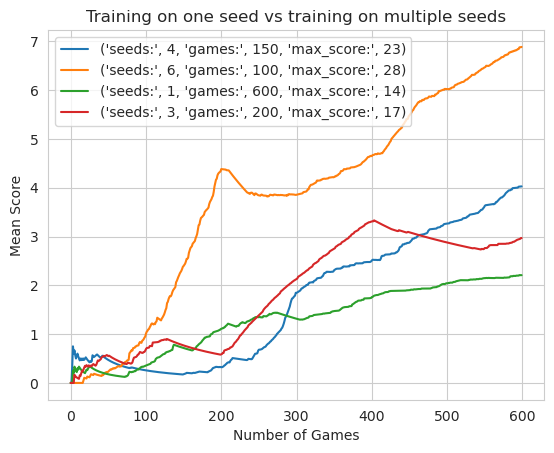

In [23]:
plt.clf()
plt.title('Training on one seed vs training on multiple seeds')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append(('seeds:', g['how_many_seeds'].values[0], 
                          'games:', g['how_many_games'].values[0],
                          'max_score:', g['scores'].max(),
                         ))
    #print(g)
plt.legend(legend_labels)
plt.show()

In [35]:
data.loc[data['positive_reward'] == 27]['mean_scores'].max()

0.6590909090909091

In [13]:
g

,iteration,ts,scores,mean_scores,game_hash,starting_timestamp,negative_reward,positive_reward,seed,how_many_seeds,how_many_games,speed
0,0,1.704554e+09,0,0.000000,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
1,1,1.704554e+09,0,0.000000,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
2,2,1.704554e+09,0,0.000000,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
3,3,1.704554e+09,0,0.000000,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
4,4,1.704554e+09,0,0.000000,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,1.704555e+09,6,2.942953,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
596,596,1.704555e+09,7,2.949749,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
597,597,1.704555e+09,5,2.953177,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000
598,598,1.704555e+09,13,2.969950,df6d2dff32572b6bc0dd8108242a112c71bf7643c39490...,1.704555e+09,-10,27,3,3,200,1000


In [26]:
best_model = pd.read_csv('stage1_best_model_performance.csv')
second_model = pd.read_csv('stage1_2nd_best_performance.csv')

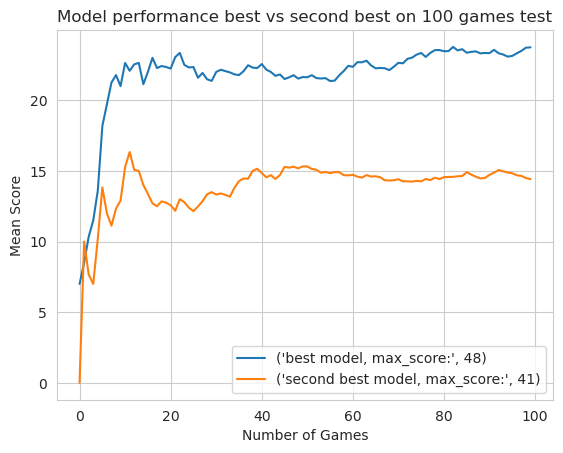

In [31]:
plt.clf()
plt.title('Model performance best vs second best on 100 games test')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
plt.plot(best_model['mean_scores'])
legend_labels.append(('best model, max_score:', best_model['scores'].max(),
                     ))
plt.plot(second_model['mean_scores'])
legend_labels.append(('second best model, max_score:', second_model['scores'].max(),
                     ))
#print(g)
plt.legend(legend_labels)
plt.show()